# Notebook 1

## Digital health and computational epidemiology
Author: Michele Tizzoni

---

### Epidemic modeling, deterministic and stochastic models

In [5]:
import networkx as nx
import numpy as np

from operator import itemgetter
from collections import defaultdict

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import seaborn as sns

In [7]:
%matplotlib inline

## The deterministic SIR model

As a first step, we solve the differential equations of an SIR model with the Euler method. 

We set the parameters of the model

In [3]:
mu = 0.2 #recovery rate

R0 = 3.0 #basic reproductive number

beta1 = R0 * mu #transmissibility

In [4]:
beta1

0.6000000000000001

In [5]:
print("The average infectious period is ", 1.0 / mu, " days")

The average infectious period is  5.0  days


The time step of integration is 1 day.

In [6]:
N = 1000000
I = 10
S = N - I
R = 0

St = []
It = []
Rt = []

deltaSt = []
deltaIt = []

St.append(S)
It.append(I)
Rt.append(R)

while I>0.01:

    deltaSI = beta1 * float(I) * S / N

    deltaIR = mu * I

    S = S - deltaSI
    I = I + deltaSI - deltaIR
    R = R + deltaIR

    deltaSt.append(deltaSI)
    deltaIt.append(deltaIR)
    St.append(S)
    It.append(I)
    Rt.append(R)

In [7]:
print("The final attack rate is ", Rt[-1] / N)

The final attack rate is  0.953213389771602


We plot the time varying curves of S, I and R

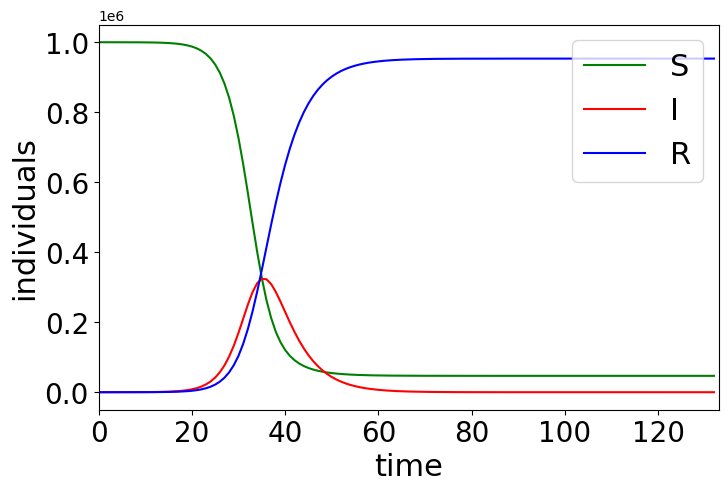

In [31]:
plt.figure(figsize=(8, 5))

plt.plot(range(0, len(St)), np.array(St), label="S", color="g")
plt.plot(range(0, len(It)), np.array(It), label="I", color="r")
plt.plot(range(0, len(Rt)), np.array(Rt), label="R", color="b")

# plt.yscale('log')
# plt.xscale('log')
plt.xlim([0, len(It)])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time", fontsize=22)
plt.ylabel("individuals", fontsize=22)

plt.legend(loc="upper right", fontsize=22)

We can plot the incidence and the newly recovered

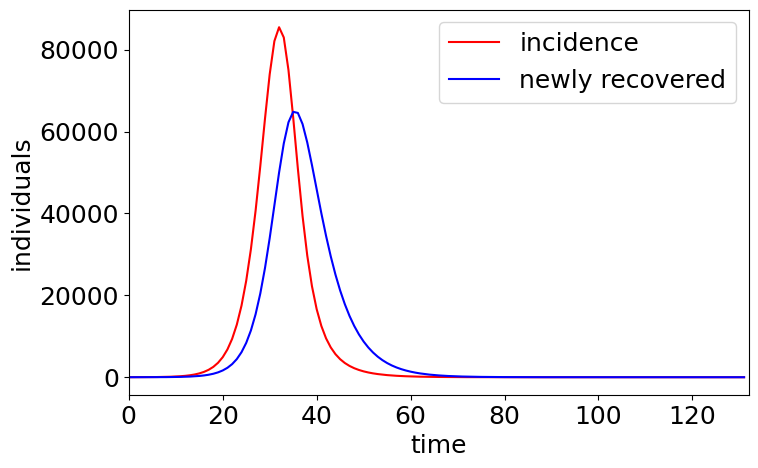

In [33]:
plt.figure(figsize=(8, 5))

plt.plot(range(0, len(deltaSt)), np.array(deltaSt), label="incidence", color="r")
plt.plot(range(0, len(deltaIt)), np.array(deltaIt), label="newly recovered", color="b")
# plt.plot(range(0, len(Rt)),np.array(Rt), label='R', color='b')

# plt.yscale('log')
plt.xlim([0, len(deltaIt)])

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("time", fontsize=18)
plt.ylabel("individuals", fontsize=18)

plt.legend(loc="upper right", fontsize=18)

## The stochastic SIR

We simulate a discrete and stochastic SIR model by randomly extracting the transition elements at each time step.
Since the simulations are stochastic, we need to run several realizations of the model and then extract their statistical averages.

We use the same model's parameters: $R_0=3.0$

In [39]:
mu = 0.2
R0 = 3.0
beta1 = R0 * mu

In [40]:
dict_I = defaultdict(list)  # here we store the number of I at each time step, for each run

In [41]:
final_R = []

nrun = 1000

Irun = []

for r in range(0, nrun):

    # for each run r, we set the initial conditions
    N = 1000000
    I = 10
    S = N - I
    R = 0

    list_I = []
    list_I.append(I)

    t = 0
    dict_I[t].append(I)

    while I > 0:

        p = beta1 * (float(I) / N)
        deltaSI = np.random.binomial(S, p)

        deltaIR = np.random.binomial(I, mu)

        S = S - deltaSI
        I = I + deltaSI - deltaIR
        R = R + deltaIR

        t += 1
        list_I.append(I)

        dict_I[t].append(I)

    final_R.append(float(R) / N)
    Irun.append(list_I)

print("The average final attack rate is ", np.average(np.array(final_R)))

The average final attack rate is  0.9532216349999999


# Distribution of the final size

We plot a histogram of the distribution of the final attack rate

Text(0, 0.5, 'runs')

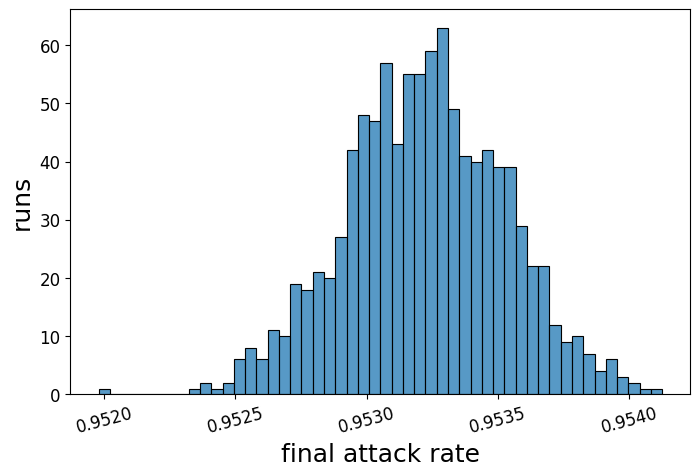

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(final_R, bins=50)

plt.xticks(fontsize=12, rotation=15)
plt.yticks(fontsize=12)

plt.xlabel("final attack rate", fontsize=18)
plt.ylabel("runs", fontsize=18)

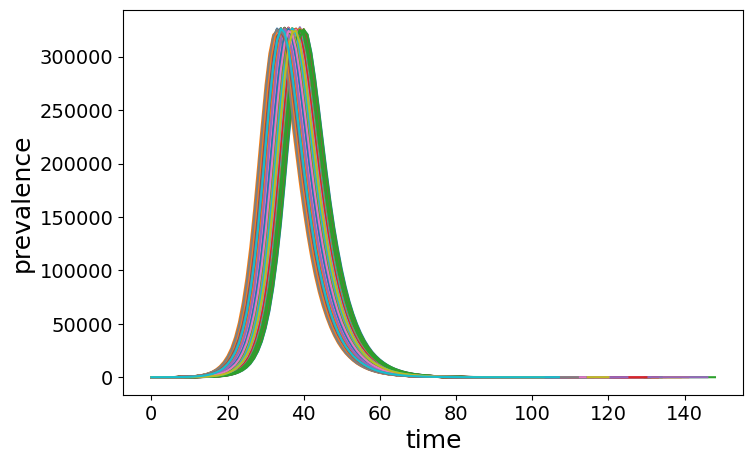

In [43]:
plt.figure(figsize=(8, 5))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("time", fontsize=18)
plt.ylabel("prevalence", fontsize=18)

for r in Irun:

    sns.lineplot(r)

Too many lines are messy... let's draw a boxplot

(20.0, 60.0)

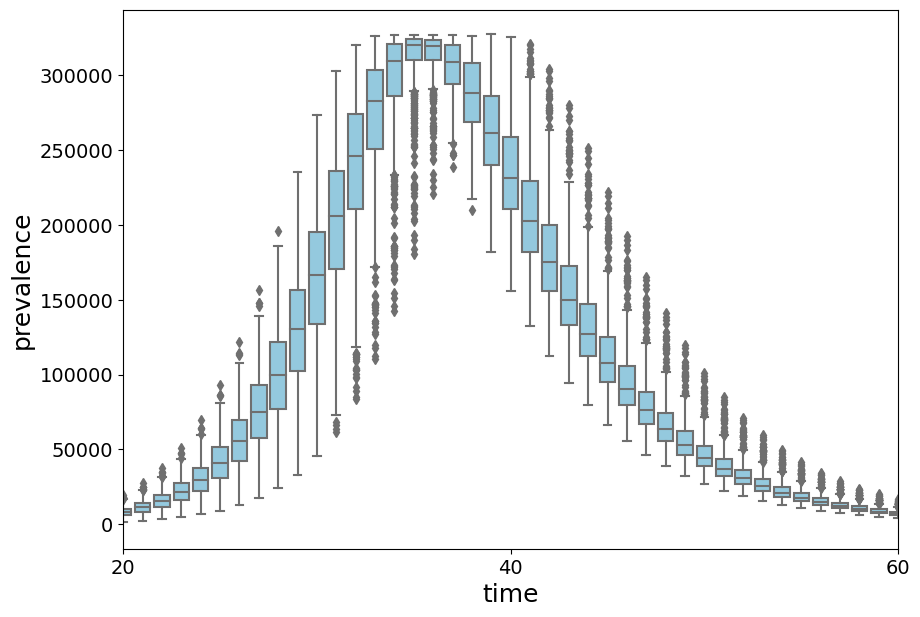

In [44]:
full_array = [np.array(dict_I[t]) for t in dict_I]

plt.figure(figsize=(10, 7))

plt.xlabel("time", fontsize=18)
plt.ylabel("prevalence", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = sns.boxplot(data=full_array, color="skyblue")

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([20, 60])
# plt.show()

Let's compare the result with the deterministic simulation by computing the average prevalence of the stochastic version.


In [45]:
full_average = [np.average(np.array(dict_I[t])) for t in dict_I]

(20.0, 40.0)

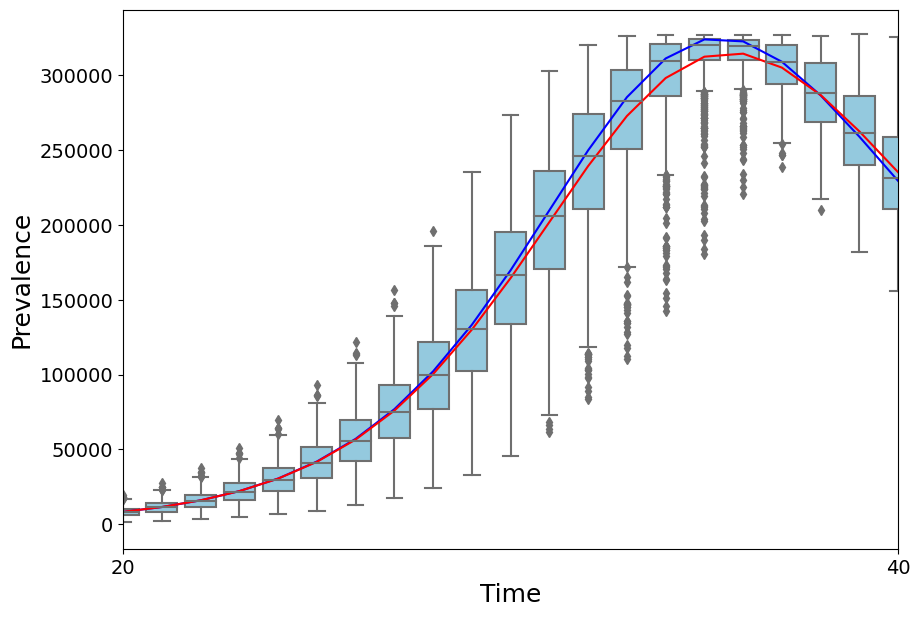

In [48]:
plt.figure(figsize=(10, 7))

plt.xlabel("Time", fontsize=18)
plt.ylabel("Prevalence", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = sns.boxplot(data=full_array, color="skyblue")

plt.plot(range(0, len(It)), It, color="b")
plt.plot(range(0, len(full_average)), full_average, color="r")

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([20,40])


# Dependence on the initial conditions

The results of the stochastic version of the model depend on the initial conditions. 

Let's change the initial number of infected individuals to 1, keeping the value of $R_0$ constant.

In [41]:
mu = 0.2
R0 = 3.0
beta1 = R0 * mu

In [42]:
dict_I = defaultdict(list)  # here we store the number of I at each time step, for each run

final_R = []

nrun = 1000
Irun = []
for r in range(0, nrun):

    # for each run r, we set the initial conditions
    N = 1000000
    I = 1
    S = N - I
    R = 0

    list_I = []

    t = 0
    dict_I[t].append(I)
    while I > 0:

        p = beta1 * (float(I) / N)
        deltaSI = np.random.binomial(S, p)

        deltaIR = np.random.binomial(I, mu)

        S = S - deltaSI
        I = I + deltaSI - deltaIR
        R = R + deltaIR

        t += 1
        list_I.append(I)

        dict_I[t].append(I)

    final_R.append(float(R) / N)
    Irun.append(list_I)

print("The average final attack rate is ", np.average(np.array(final_R)))

The average final attack rate is  0.702520049


**With only 1 infected as a seed, we see more fluctuations, as expected.**

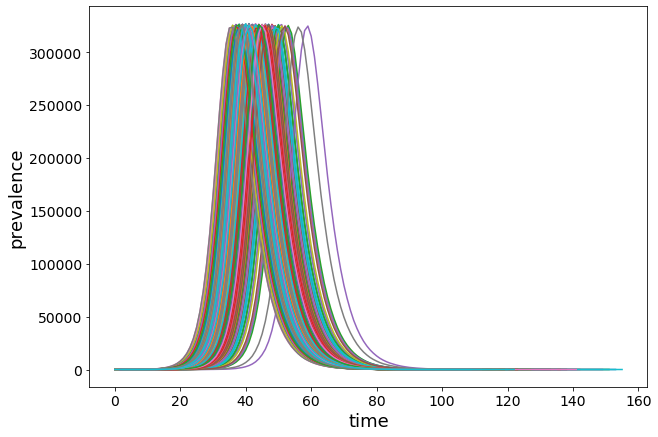

In [43]:
plt.figure(figsize=(10, 7))
plt.xlabel("time", fontsize=18)
plt.ylabel("prevalence", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for r in Irun:

    sns.plot(range(0, len(r)), r)

## We have several runs without outbreak!  

The initial seed individual recovers before infecting someone else.

The chain of transmission breaks down.

In [45]:
no_outbreak = []
for r in final_R:
    if r < 0.8:
        no_outbreak.append(r * 1000000)
print(no_outbreak)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 5.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 4.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 4.0, 2.0, 5.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 5.0, 1.0, 2.0, 4.0, 1.0, 6.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 4.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.0, 3.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 7.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 7.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 3.0,

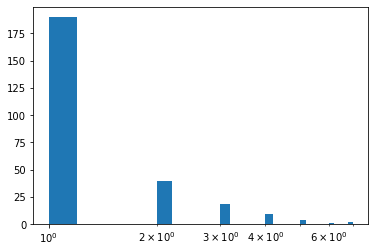

In [46]:
b = plt.hist(no_outbreak, bins=30)
plt.xscale("log")

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text yticklabel objects>)

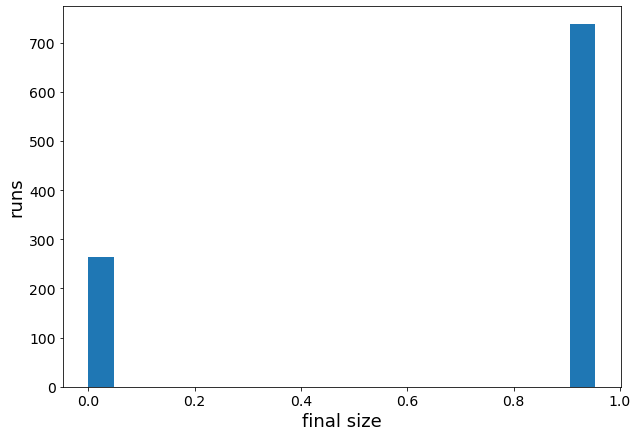

In [47]:
plt.figure(figsize=(10, 7))
plt.hist(final_R, 20)
plt.xlabel("final size", fontsize=18)
plt.ylabel("runs", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [48]:
len(no_outbreak)

263

---
In a stochastic SIR model, the probability of an outbreak is equal to 
<center>
$p_{outb}=1-(\frac{1}{R_0})^{I_0}$
</center>

---

In [49]:
p_outbreak = 1 - 1 / R0

In [50]:
p_outbreak

0.6666666666666667

Of course, such fluctuations do not affect the deterministic model, where the outcome is fixed. 

In [118]:
N = 10000
I = 1
S = N - I
R = 0


St = []
It = []
Rt = []

St.append(S)
It.append(I)
Rt.append(R)

while I > 0.5:
    deltaSI = beta1 * (float(I) * float(S) / N)
    deltaIR = mu * I

    S = S - deltaSI
    I = I + deltaSI - deltaIR
    R = R + deltaIR

    St.append(S)
    It.append(I)
    Rt.append(R)

In [119]:
print("The final attack rate is ", Rt[-1] / N)

The final attack rate is  0.9531700082169579


--- 
# Age-structured SEIR epidemic model

Here, we develop an age-structured epidemic model where the population is divided into age classes.

In [1]:
import pandas as pd

import scipy.linalg as la

# Contact matrix

First, we need to define the contact matrix for the population of interest.
We can use the Polymod contact data that were collected by [Mossong et al. 2008](https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.0050074).

The data is easily accessible in different formats.
The most convenient way to get a Polymod contact matrix is thorugh the R package [socialmixr](https://cran.r-project.org/web/packages/socialmixr/vignettes/socialmixr.html) developed by [Sebastian Funk](https://www.lshtm.ac.uk/aboutus/people/funk.sebastian) (sometimes R is useful! :) ).

I have used the following R command to generate the contact matrix of Italy, with 9 age brackets

```R
contact_matrix(polymod, countries = "Italy", age.limits = c(0, 10, 20, 30, 40, 50, 60, 70, 80, 90), symmetric = TRUE, per.capita = TRUE)
```

and saved the result into the file ```matrix_Italy.csv```



Text(0, 0.5, 'age class participant')

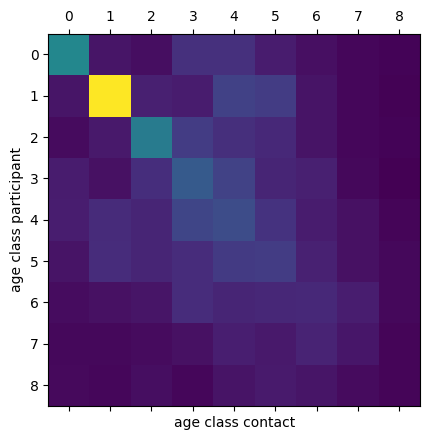

In [8]:
#read the contact matrix
M_df = pd.read_csv('./../datasets/matrix_Italy.csv').drop('Unnamed: 0', axis = 1)

plt.matshow(M_df)
plt.xlabel('age class contact')
plt.ylabel('age class participant')

In [9]:
def init_comp0(pop, key_seed, seeds):    
    S0 = {}
    E0 = {}
    I0 = {}
    R0 = {}
    
    for i,key in enumerate(pop):        
            
        S0.setdefault(key,{})
        E0.setdefault(key,{})
        I0.setdefault(key,{})
        R0.setdefault(key,{})
        
        if key == key_seed:
            Ii = seeds
        else:
            Ii = 0

   
        S0[key][0]= pop[key] - Ii
        E0[key][0]= 0
        I0[key][0]= Ii
        R0[key][0]=0
    
    return S0, E0, I0, R0

In [10]:
def run_epi(C0, pop, M,  beta_val:float, mu_val:float, eps_val:float, stop:int):
    '''
    C0:  initialization for the compartmens
         list of dict -> C[key][0] = C0_val
    pop: population vector
         dict {key: pop_key}
         
    M:   contact matrix
         dict {key:{key1:c_val, key2:c_val}}
    
    beta_val: infection probability 
    mu_val:   recovery rate (1/d , d:generation time)
    eps_val:  probability to become infectious
    
    stop:   number of timesteps to simulate
    '''
    #. set initial compartments
    #  compartment = [var1,var2][time]
    S,E,I,R = C0
    
    
    # . controlli
    keys = pop.keys()
    keys1 = M.keys()
    
    if keys!= keys1:
        print('Population vector and Contact matrix must have same keys!')

    # . running the epidemic
    for t in range(1,stop):
        print('t_{} '.format(t), end = '\r')        
        
        for m_key in keys:
            
            C_key = M[m_key]
            cc = []
            for kc in C_key:
                cc.append(C_key[kc]*(I[kc][t-1]/pop[kc]))
                #print(t, ':', I[kc][t-1])

            lambda_val = beta_val*sum(cc)
            

            new_E = np.random.binomial(S[m_key][t-1] ,1.-np.exp(-lambda_val))
            new_I = np.random.binomial(E[m_key][t-1] , eps_val)
            new_R = np.random.binomial(I[m_key][t-1] , mu_val)
                
                
            S[m_key][t] =  S[m_key][t-1] -  new_E
            E[m_key][t] =  E[m_key][t-1] +  new_E -  new_I
            
            I[m_key][t] =  I[m_key][t-1] +  new_I -  new_R
            R[m_key][t] =  R[m_key][t-1] +  new_R
        
        totI = sum([I[key][t] for key in keys])
        
        if (t >300) and (totI < 1):
            break
                 
    return S,E, I,R, t

In [11]:
# re-arranging matrix as dictionary
M = {}
for i, m in enumerate(np.array(M_df)):
    M[i] = {i:mj for i,mj in enumerate(m)}

The R package [socialmixr](https://cran.r-project.org/web/packages/socialmixr/vignettes/socialmixr.html) 
also provides access to the demographics of each country.

In [29]:
# - population distribution by age in Italy
pop = {0: 5471539,
    1: 5732722,
    2: 6955502, 
    3: 9350120,
    4: 8838414, 
    5: 7705158, 
    6: 6584286,
    7: 5238248,
    8: 2932492,
    }

In [30]:
# initializing compartments at t=0
C0  = init_comp0(pop, np.random.randint(9), 10)

# initializing epi parameters
def get_beta(M, R0, mu_val):
    
    eigvals, eigvecs = la.eig(M)
    leading=eigvals.real[0]
    
    beta_val=mu_val*R0/(leading)
    return beta_val

r0 = 3
mu_val = 1/4
eps_val = 1/2.5

beta_val = get_beta(M_df.values, r0, mu_val)

stop = 200

In [31]:
S,E,I,R,t = run_epi(C0,pop,M,  beta_val, mu_val, eps_val, stop)

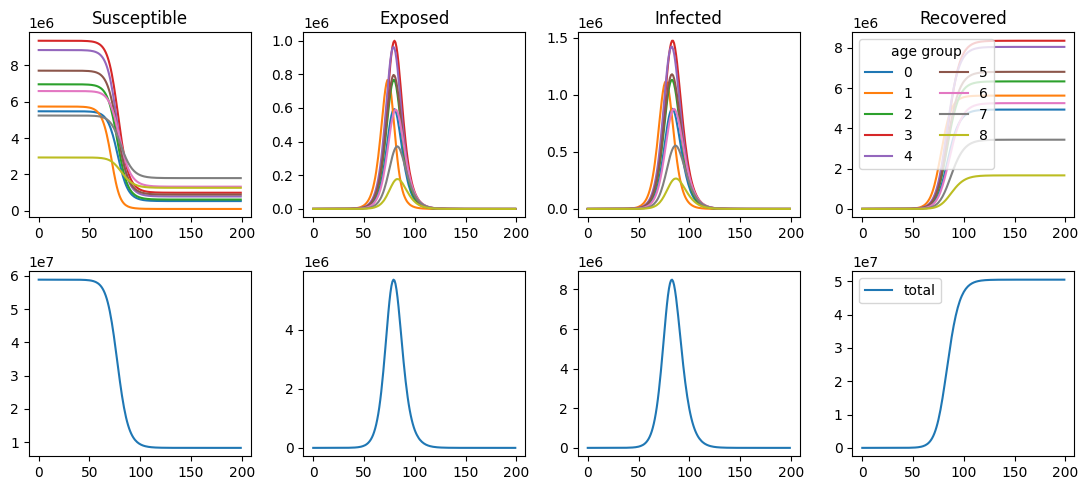

In [32]:
#Epi dynamic plots

fig, axs = plt.subplots(2,4 , figsize =(11, 5))#,  sharex='row', sharey='row')

r = 0
for key in S:
    axs[r, 0].plot(S[key].values())
    axs[r, 1].plot(E[key].values())
    axs[r, 2].plot(I[key].values())
    axs[r, 3].plot(R[key].values(), label = key)

for c,title in enumerate(['Susceptible', 'Exposed', 'Infected', 'Recovered']):
    axs[r,c].set_title(title)

axs[r, 3].legend(ncol = 2, title = 'age group')


S_tot = pd.DataFrame(S).sum(axis = 1)
E_tot = pd.DataFrame(E).sum(axis = 1)
I_tot = pd.DataFrame(I).sum(axis = 1)
R_tot = pd.DataFrame(R).sum(axis = 1)


r = 1
axs[r, 0].plot(S_tot)
axs[r, 1].plot(E_tot)
axs[r, 2].plot(I_tot)
axs[r, 3].plot(R_tot, label = 'total')
axs[r, 3].legend(ncol = 2)

plt.tight_layout()